In [1]:
!pip install gym stable_baselines3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 177 kB 7.0 MB/s 
     |████████████████████████████████| 1.5 MB 23.7 MB/s 
  Created wheel for gym: filename=gym-0.21.0-py3-none-any.whl size=1616827 sha256=d31dcf5c439435faad5adba84b62ca1405566da444e0cd9435d0651362c84f82
  Stored in directory: /root/.cache/pip/wheels/76/ee/9c/36bfe3e079df99acf5ae57f4e3464ff2771b34447d6d2f2148
Successfully built gym
  Attempting uninstall: gym
    Found existing installation: gym 0.17.3
    Uninstalling gym-0.17.3:
      Successfully uninstalled gym-0.17.3


In [2]:
!apt-get install python-opengl -y

!apt install xvfb -y

!pip install pyvirtualdisplay

!pip install piglet

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
Suggested packages:
  libgle3
The following NEW packages will be installed:
  python-opengl
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 496 kB of archives.
After this operation, 5,416 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python-opengl all 3.1.0+dfsg-1 [496 kB]
Fetched 496 kB in 1s (783 kB/s)
Selecting previously unselected package python-opengl.
(Reading database ... 155632 files and directories currently installed.)
Preparing to unpack .../python-opengl_3.1.0+dfsg-1_all.deb ...
Unpacking python-opengl (3.1.0+dfsg-1) ...
Setting up python-opengl (3.1.0+dfsg-1) ...
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The 

In [3]:
from pyvirtualdisplay import Display
Display().start()

import gym
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

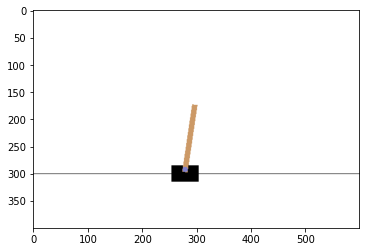

In [4]:
env = gym.make('CartPole-v0')
env.reset()
img = plt.imshow(env.render('rgb_array'))
for _ in range(40):
    img.set_data(env.render('rgb_array')) 
    display.display(plt.gcf())
    display.clear_output(wait=True)
    action = env.action_space.sample()
    env.step(action)

In [5]:
import gym
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy

In [6]:
for episode in range(1, 11):
    score = 0
    state = env.reset()
    done = False
    
    while not done:
        env.render()
        action = env.action_space.sample()
        n_state, reward, done, info = env.step(action)
        score += reward
        
    print('Episode:', episode, 'Score:', score)
env.close()

Episode: 1 Score: 15.0
Episode: 2 Score: 17.0
Episode: 3 Score: 21.0
Episode: 4 Score: 20.0
Episode: 5 Score: 24.0
Episode: 6 Score: 19.0
Episode: 7 Score: 41.0
Episode: 8 Score: 25.0
Episode: 9 Score: 12.0
Episode: 10 Score: 54.0


In [7]:
env_name = 'CartPole-v0'
env = gym.make(env_name)
env = DummyVecEnv([lambda: env])
model = PPO('MlpPolicy', env, verbose=1)

Using cpu device


In [8]:
model.learn(total_timesteps=20000)

-----------------------------
| time/              |      |
|    fps             | 1488 |
|    iterations      | 1    |
|    time_elapsed    | 1    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 1042        |
|    iterations           | 2           |
|    time_elapsed         | 3           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.009043187 |
|    clip_fraction        | 0.101       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.686      |
|    explained_variance   | -0.000255   |
|    learning_rate        | 0.0003      |
|    loss                 | 6.66        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0155     |
|    value_loss           | 51.7        |
-----------------------------------------
----------------------------------

In [9]:
evaluate_policy(model, env, n_eval_episodes=10, render=True)

/usr/local/lib/python3.7/dist-packages/stable_baselines3/common/evaluation.py:69: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  UserWarning,


(200.0, 0.0)

In [10]:
for episode in range(1, 11):
    score = 0
    obs = env.reset()
    done = False
    
    while not done:
        env.render()
        action, _ = model.predict(obs)
        obs, reward, done, info = env.step(action)
        score += reward
        
    print('Episode:', episode, 'Score:', score)
env.close()

Episode: 1 Score: [200.]
Episode: 2 Score: [200.]
Episode: 3 Score: [200.]
Episode: 4 Score: [200.]
Episode: 5 Score: [200.]
Episode: 6 Score: [200.]
Episode: 7 Score: [200.]
Episode: 8 Score: [200.]
Episode: 9 Score: [200.]
Episode: 10 Score: [200.]
